# Configuration

In [1]:
import mlflow
from datetime import datetime

from steps.data import main as data_main
from steps.train import main as train_main
from steps.validate import main as validate_main
from steps.deploy import main as deploy_main

EXPERIMENT_NAME = "tfm-ocr-chars"

mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("tfm-ocr-chars")


def execution_name(prefix="pipeline"):
    now = datetime.now().strftime("%Y%m%d-%H%M%S")
    return f"{prefix}-{now}"

mlflow.set_experiment(EXPERIMENT_NAME)


/home/dborrego/.local/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dborrego/.local/lib/python3.13/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


<Experiment: artifact_location='mlflow-artifacts:/789695712835189835', creation_time=1768401267123, experiment_id='789695712835189835', last_update_time=1768401267123, lifecycle_stage='active', name='tfm-ocr-chars', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [2]:
parent_run = mlflow.start_run(run_name=execution_name(), nested=False)
parent_run.info.run_id


'e047fe6cbb9a43479f9e5c4afe4bd739'

# DATA

[DATOS] Subetapas completadas correctamente
🏃 View run datos at: http://localhost:5000/#/experiments/789695712835189835/runs/f32caffd17eb4a53ae2448e2ce976b98
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835


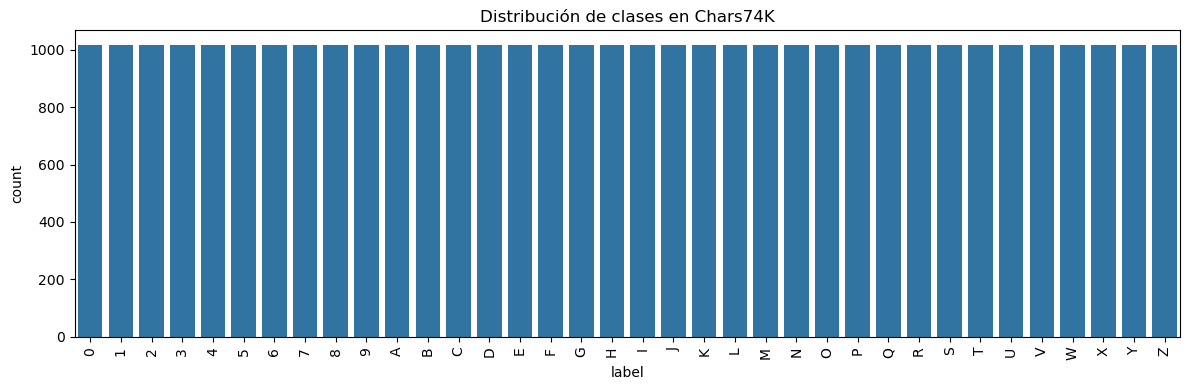

In [3]:
data_main()

# TRAIN

In [4]:
model = train_main(
    n_trials=20,
    epochs=80
)

[I 2026-01-21 18:33:02,211] A new study created in memory with name: ocr-hpo


[Epoch 0] tr_acc=0.638 val_acc=0.906 val_f1m=0.906 top3=0.960 lr=1.29e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9062 (val_acc=0.9055)
[Epoch 1] tr_acc=0.911 val_acc=0.942 val_f1m=0.941 top3=0.980 lr=1.29e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9412 (val_acc=0.9416)
[Epoch 2] tr_acc=0.937 val_acc=0.957 val_f1m=0.956 top3=0.988 lr=1.29e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9558 (val_acc=0.9565)
[Epoch 3] tr_acc=0.949 val_acc=0.961 val_f1m=0.960 top3=0.990 lr=1.29e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9603 (val_acc=0.9609)
[Epoch 4] tr_acc=0.955 val_acc=0.965 val_f1m=0.964 top3=0.992 lr=1.29e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9639 (val_acc=0.9646)
[Epoch 5] tr_acc=0.960 val_acc=0.966 val_f1m=0.965 top3=0.994 lr=1.29e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9652 (val_acc=0.9658)
[Epoch 6] tr_acc=0.965 val_acc=0.971 val_f1m=0.971 top3=0.995 lr=1.29e-04
[Epoch 6] ✅ Improved val_f1_macro=0.9705 (val_acc=0.9714)
[Epoch 7] tr_acc=0.969 val_acc=0.974 val_f1m=0.973 top3=0.995 lr=1.29e-04
[E

[I 2026-01-21 18:50:36,605] Trial 0 finished with value: 0.9866517267607955 and parameters: {'batch': 128, 'lr': 0.0001291859358961148, 'weight_decay': 1.365033162588266e-06, 'grad_clip': 1.6872844908124771, 'label_smoothing': 0.061084943431058525}. Best is trial 0 with value: 0.9866517267607955.


🏃 View run trial-0 at: http://localhost:5000/#/experiments/789695712835189835/runs/022c909405d9478485fcec1625ee9573
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.795 val_acc=0.945 val_f1m=0.944 top3=0.984 lr=2.27e-03
[Epoch 0] ✅ Improved val_f1_macro=0.9444 (val_acc=0.9448)
[Epoch 1] tr_acc=0.922 val_acc=0.955 val_f1m=0.955 top3=0.991 lr=2.27e-03
[Epoch 1] ✅ Improved val_f1_macro=0.9545 (val_acc=0.9553)
[Epoch 2] tr_acc=0.942 val_acc=0.969 val_f1m=0.968 top3=0.992 lr=2.27e-03
[Epoch 2] ✅ Improved val_f1_macro=0.9678 (val_acc=0.9687)
[Epoch 3] tr_acc=0.956 val_acc=0.970 val_f1m=0.969 top3=0.995 lr=2.27e-03
[Epoch 3] ✅ Improved val_f1_macro=0.9685 (val_acc=0.9695)
[Epoch 4] tr_acc=0.963 val_acc=0.979 val_f1m=0.978 top3=0.998 lr=2.27e-03
[Epoch 4] ✅ Improved val_f1_macro=0.9778 (val_acc=0.9788)
[Epoch 5] tr_acc=0.969 val_acc=0.981 val_f1m=0.980 top3=0.998 lr=2.27e-03
[Epoch 5] ✅ Improved val_f1_macro=0.9800 (val_acc=0.9809)
[Epoch 6] tr_ac

[I 2026-01-21 19:19:10,674] Trial 1 finished with value: 0.988988775277349 and parameters: {'batch': 32, 'lr': 0.002265049060904645, 'weight_decay': 0.0001308339951746144, 'grad_clip': 1.0814250666263394, 'label_smoothing': 0.03273816158186802}. Best is trial 1 with value: 0.988988775277349.


🏃 View run trial-1 at: http://localhost:5000/#/experiments/789695712835189835/runs/9cca3a0c725d49c09a83fad4ac26a3b9
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.786 val_acc=0.944 val_f1m=0.944 top3=0.982 lr=2.35e-03
[Epoch 0] ✅ Improved val_f1_macro=0.9438 (val_acc=0.9441)
[Epoch 1] tr_acc=0.936 val_acc=0.962 val_f1m=0.961 top3=0.990 lr=2.35e-03
[Epoch 1] ✅ Improved val_f1_macro=0.9612 (val_acc=0.9619)
[Epoch 2] tr_acc=0.952 val_acc=0.968 val_f1m=0.968 top3=0.993 lr=2.35e-03
[Epoch 2] ✅ Improved val_f1_macro=0.9678 (val_acc=0.9684)
[Epoch 3] tr_acc=0.960 val_acc=0.973 val_f1m=0.972 top3=0.996 lr=2.35e-03
[Epoch 3] ✅ Improved val_f1_macro=0.9720 (val_acc=0.9732)
[Epoch 4] tr_acc=0.967 val_acc=0.977 val_f1m=0.976 top3=0.997 lr=2.35e-03
[Epoch 4] ✅ Improved val_f1_macro=0.9756 (val_acc=0.9766)
[Epoch 5] tr_acc=0.972 val_acc=0.980 val_f1m=0.979 top3=0.997 lr=2.35e-03
[Epoch 5] ✅ Improved val_f1_macro=0.9789 (val_acc=0.9799)
[Epoch 6] tr_ac

[I 2026-01-21 19:40:55,275] Trial 2 finished with value: 0.9885068194321224 and parameters: {'batch': 128, 'lr': 0.0023504890335305575, 'weight_decay': 9.067078932116488e-06, 'grad_clip': 1.9879848658750459, 'label_smoothing': 0.0819552147483427}. Best is trial 1 with value: 0.988988775277349.


🏃 View run trial-2 at: http://localhost:5000/#/experiments/789695712835189835/runs/3463034c3f4c43bb8b321f7ea9cbeaf4
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.826 val_acc=0.943 val_f1m=0.943 top3=0.982 lr=9.94e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9430 (val_acc=0.9434)
[Epoch 1] tr_acc=0.938 val_acc=0.962 val_f1m=0.962 top3=0.991 lr=9.94e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9616 (val_acc=0.9624)
[Epoch 2] tr_acc=0.952 val_acc=0.971 val_f1m=0.970 top3=0.994 lr=9.94e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9703 (val_acc=0.9712)
[Epoch 3] tr_acc=0.961 val_acc=0.976 val_f1m=0.975 top3=0.996 lr=9.94e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9751 (val_acc=0.9761)
[Epoch 4] tr_acc=0.967 val_acc=0.978 val_f1m=0.977 top3=0.998 lr=9.94e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9769 (val_acc=0.9777)
[Epoch 5] tr_acc=0.972 val_acc=0.981 val_f1m=0.980 top3=0.998 lr=9.94e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9798 (val_acc=0.9807)
[Epoch 6] tr_ac

[I 2026-01-21 20:06:39,667] Trial 3 finished with value: 0.9893239351463071 and parameters: {'batch': 32, 'lr': 0.0009944669888745366, 'weight_decay': 0.00023859311505871757, 'grad_clip': 1.5056282093203284, 'label_smoothing': 0.02473599369566152}. Best is trial 3 with value: 0.9893239351463071.


🏃 View run trial-3 at: http://localhost:5000/#/experiments/789695712835189835/runs/045b2e6394e9411dbc2942de868380d2
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.813 val_acc=0.946 val_f1m=0.946 top3=0.982 lr=1.40e-03
[Epoch 0] ✅ Improved val_f1_macro=0.9456 (val_acc=0.9460)
[Epoch 1] tr_acc=0.945 val_acc=0.964 val_f1m=0.963 top3=0.992 lr=1.40e-03
[Epoch 1] ✅ Improved val_f1_macro=0.9630 (val_acc=0.9638)
[Epoch 2] tr_acc=0.960 val_acc=0.972 val_f1m=0.971 top3=0.995 lr=1.40e-03
[Epoch 2] ✅ Improved val_f1_macro=0.9708 (val_acc=0.9717)
[Epoch 3] tr_acc=0.966 val_acc=0.974 val_f1m=0.974 top3=0.997 lr=1.40e-03
[Epoch 3] ✅ Improved val_f1_macro=0.9736 (val_acc=0.9744)
[Epoch 4] tr_acc=0.973 val_acc=0.977 val_f1m=0.976 top3=0.998 lr=1.40e-03
[Epoch 4] ✅ Improved val_f1_macro=0.9765 (val_acc=0.9773)
[Epoch 5] tr_acc=0.977 val_acc=0.982 val_f1m=0.981 top3=0.999 lr=1.40e-03
[Epoch 5] ✅ Improved val_f1_macro=0.9813 (val_acc=0.9822)
[Epoch 6] tr_ac

[I 2026-01-21 20:29:01,411] Trial 4 finished with value: 0.990952659170862 and parameters: {'batch': 128, 'lr': 0.0014002533076375538, 'weight_decay': 2.6148819358063207e-06, 'grad_clip': 1.1009757548683785, 'label_smoothing': 0.03504319595300447}. Best is trial 4 with value: 0.990952659170862.


🏃 View run trial-4 at: http://localhost:5000/#/experiments/789695712835189835/runs/d67fa17d8c0d42bb94c09f0aa7d7c76c
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.796 val_acc=0.942 val_f1m=0.942 top3=0.982 lr=2.41e-03
[Epoch 0] ✅ Improved val_f1_macro=0.9419 (val_acc=0.9422)
[Epoch 1] tr_acc=0.924 val_acc=0.963 val_f1m=0.962 top3=0.990 lr=2.41e-03
[Epoch 1] ✅ Improved val_f1_macro=0.9621 (val_acc=0.9631)
[Epoch 2] tr_acc=0.944 val_acc=0.970 val_f1m=0.968 top3=0.994 lr=2.41e-03
[Epoch 2] ✅ Improved val_f1_macro=0.9683 (val_acc=0.9695)
[Epoch 3] tr_acc=0.953 val_acc=0.974 val_f1m=0.973 top3=0.995 lr=2.41e-03
[Epoch 3] ✅ Improved val_f1_macro=0.9731 (val_acc=0.9740)
[Epoch 4] tr_acc=0.959 val_acc=0.974 val_f1m=0.974 top3=0.996 lr=2.41e-03
[Epoch 4] ✅ Improved val_f1_macro=0.9736 (val_acc=0.9744)
[Epoch 5] tr_acc=0.965 val_acc=0.977 val_f1m=0.976 top3=0.998 lr=2.41e-03
[Epoch 5] ✅ Improved val_f1_macro=0.9760 (val_acc=0.9768)
[Epoch 6] tr_ac

[I 2026-01-21 20:52:25,315] Trial 5 finished with value: 0.9874082455880777 and parameters: {'batch': 32, 'lr': 0.0024141441410952726, 'weight_decay': 0.008736700368565014, 'grad_clip': 1.97645314960391, 'label_smoothing': 0.06623070652412862}. Best is trial 4 with value: 0.990952659170862.


🏃 View run trial-5 at: http://localhost:5000/#/experiments/789695712835189835/runs/43c5f72311554293a9b766cf892aaa0b
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.748 val_acc=0.939 val_f1m=0.938 top3=0.978 lr=1.06e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9383 (val_acc=0.9388)
[Epoch 1] tr_acc=0.931 val_acc=0.956 val_f1m=0.955 top3=0.987 lr=1.06e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9549 (val_acc=0.9556)
[Epoch 2] tr_acc=0.949 val_acc=0.966 val_f1m=0.965 top3=0.991 lr=1.06e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9649 (val_acc=0.9660)
[Epoch 3] tr_acc=0.958 val_acc=0.973 val_f1m=0.972 top3=0.993 lr=1.06e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9718 (val_acc=0.9727)
[Epoch 4] tr_acc=0.965 val_acc=0.973 val_f1m=0.973 top3=0.996 lr=1.06e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9726 (val_acc=0.9733)
[Epoch 5] tr_acc=0.969 val_acc=0.976 val_f1m=0.975 top3=0.997 lr=1.06e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9751 (val_acc=0.9762)
[Epoch 6] tr_ac

[I 2026-01-21 21:24:39,004] Trial 6 finished with value: 0.9885942539948732 and parameters: {'batch': 32, 'lr': 0.00010640307475783529, 'weight_decay': 2.605578093041081e-05, 'grad_clip': 1.3225044812025117, 'label_smoothing': 0.018774107640648442}. Best is trial 4 with value: 0.990952659170862.


🏃 View run trial-6 at: http://localhost:5000/#/experiments/789695712835189835/runs/749ce93a7ccc4565b87253f8858f4246
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.778 val_acc=0.941 val_f1m=0.941 top3=0.981 lr=1.30e-03
[Epoch 0] ✅ Improved val_f1_macro=0.9411 (val_acc=0.9415)
[Epoch 1] tr_acc=0.944 val_acc=0.962 val_f1m=0.961 top3=0.991 lr=1.30e-03
[Epoch 1] ✅ Improved val_f1_macro=0.9609 (val_acc=0.9617)
[Epoch 2] tr_acc=0.959 val_acc=0.972 val_f1m=0.971 top3=0.994 lr=1.30e-03
[Epoch 2] ✅ Improved val_f1_macro=0.9709 (val_acc=0.9717)
[Epoch 3] tr_acc=0.968 val_acc=0.972 val_f1m=0.971 top3=0.996 lr=1.30e-03
[Epoch 3] ❌ No improvement: val_f1_macro=0.9708 (best=0.9709 @ epoch 2) | no_improve=1/5
[Epoch 4] tr_acc=0.972 val_acc=0.977 val_f1m=0.976 top3=0.997 lr=1.30e-03
[Epoch 4] ✅ Improved val_f1_macro=0.9761 (val_acc=0.9769)
[Epoch 5] tr_acc=0.976 val_acc=0.977 val_f1m=0.976 top3=0.997 lr=1.30e-03
[Epoch 5] ❌ No improvement: val_f1_macro=0

[I 2026-01-21 21:43:18,368] Trial 7 finished with value: 0.9893155730229254 and parameters: {'batch': 256, 'lr': 0.001301845970158789, 'weight_decay': 0.00039759757515972884, 'grad_clip': 0.7272702055330371, 'label_smoothing': 0.09823014166590255}. Best is trial 4 with value: 0.990952659170862.


🏃 View run trial-7 at: http://localhost:5000/#/experiments/789695712835189835/runs/796b16b643814c4aa77fed535dac73d9
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.797 val_acc=0.945 val_f1m=0.945 top3=0.984 lr=2.29e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9447 (val_acc=0.9450)
[Epoch 1] tr_acc=0.942 val_acc=0.957 val_f1m=0.956 top3=0.991 lr=2.29e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9556 (val_acc=0.9571)
[Epoch 2] tr_acc=0.955 val_acc=0.972 val_f1m=0.971 top3=0.994 lr=2.29e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9709 (val_acc=0.9717)
[Epoch 3] tr_acc=0.964 val_acc=0.976 val_f1m=0.974 top3=0.996 lr=2.29e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9745 (val_acc=0.9755)
[Epoch 4] tr_acc=0.970 val_acc=0.980 val_f1m=0.979 top3=0.998 lr=2.29e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9793 (val_acc=0.9802)
[Epoch 5] tr_acc=0.974 val_acc=0.978 val_f1m=0.977 top3=0.998 lr=2.29e-04
[Epoch 5] ❌ No improvement: val_f1_macro=0.9773 (best=0.9793 @ epoch 4) |

[I 2026-01-21 22:18:47,139] Trial 8 finished with value: 0.9905214383758345 and parameters: {'batch': 32, 'lr': 0.00022891776169027965, 'weight_decay': 7.614823315175134e-06, 'grad_clip': 1.9496581761304779, 'label_smoothing': 0.008472412989247969}. Best is trial 4 with value: 0.990952659170862.


🏃 View run trial-8 at: http://localhost:5000/#/experiments/789695712835189835/runs/02812eb703b34f8da3562af2a4cf657c
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.763 val_acc=0.943 val_f1m=0.942 top3=0.981 lr=4.27e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9423 (val_acc=0.9429)
[Epoch 1] tr_acc=0.940 val_acc=0.956 val_f1m=0.956 top3=0.988 lr=4.27e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9558 (val_acc=0.9564)
[Epoch 2] tr_acc=0.955 val_acc=0.968 val_f1m=0.967 top3=0.994 lr=4.27e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9674 (val_acc=0.9680)
[Epoch 3] tr_acc=0.963 val_acc=0.974 val_f1m=0.973 top3=0.995 lr=4.27e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9733 (val_acc=0.9742)
[Epoch 4] tr_acc=0.970 val_acc=0.974 val_f1m=0.973 top3=0.996 lr=4.27e-04
[Epoch 4] ❌ No improvement: val_f1_macro=0.9731 (best=0.9733 @ epoch 3) | no_improve=1/5
[Epoch 5] tr_acc=0.973 val_acc=0.979 val_f1m=0.978 top3=0.997 lr=4.27e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9782 (

[I 2026-01-21 22:39:52,847] Trial 9 finished with value: 0.9902135745453887 and parameters: {'batch': 128, 'lr': 0.00042742933991221323, 'weight_decay': 3.539131346724765e-05, 'grad_clip': 1.0721325159843198, 'label_smoothing': 0.027346276746758314}. Best is trial 4 with value: 0.990952659170862.


🏃 View run trial-9 at: http://localhost:5000/#/experiments/789695712835189835/runs/ee3377bb86ba4f49b887926f5a41d6f4
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.832 val_acc=0.947 val_f1m=0.946 top3=0.986 lr=6.76e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9463 (val_acc=0.9471)
[Epoch 1] tr_acc=0.948 val_acc=0.967 val_f1m=0.966 top3=0.992 lr=6.76e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9663 (val_acc=0.9673)
[Epoch 2] tr_acc=0.961 val_acc=0.971 val_f1m=0.970 top3=0.995 lr=6.76e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9701 (val_acc=0.9712)
[Epoch 3] tr_acc=0.968 val_acc=0.976 val_f1m=0.975 top3=0.997 lr=6.76e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9748 (val_acc=0.9757)
[Epoch 4] tr_acc=0.973 val_acc=0.977 val_f1m=0.976 top3=0.998 lr=6.76e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9764 (val_acc=0.9773)
[Epoch 5] tr_acc=0.977 val_acc=0.983 val_f1m=0.982 top3=0.998 lr=6.76e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9815 (val_acc=0.9825)
[Epoch 6] tr_ac

[I 2026-01-21 23:10:47,139] Trial 10 finished with value: 0.9906786439250383 and parameters: {'batch': 64, 'lr': 0.0006762390543680583, 'weight_decay': 1.1718106284117315e-06, 'grad_clip': 0.5567029238058852, 'label_smoothing': 0.04590930551862556}. Best is trial 4 with value: 0.990952659170862.


🏃 View run trial-10 at: http://localhost:5000/#/experiments/789695712835189835/runs/cc7f1132632b4e2e9c55bf7179ee1fd3
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.819 val_acc=0.947 val_f1m=0.946 top3=0.983 lr=6.89e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9462 (val_acc=0.9470)
[Epoch 1] tr_acc=0.948 val_acc=0.964 val_f1m=0.963 top3=0.994 lr=6.89e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9631 (val_acc=0.9640)
[Epoch 2] tr_acc=0.957 val_acc=0.970 val_f1m=0.969 top3=0.995 lr=6.89e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9691 (val_acc=0.9701)
[Epoch 3] tr_acc=0.967 val_acc=0.979 val_f1m=0.978 top3=0.998 lr=6.89e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9777 (val_acc=0.9787)
[Epoch 4] tr_acc=0.971 val_acc=0.979 val_f1m=0.978 top3=0.997 lr=6.89e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9783 (val_acc=0.9792)
[Epoch 5] tr_acc=0.975 val_acc=0.981 val_f1m=0.980 top3=0.998 lr=6.89e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9802 (val_acc=0.9811)
[Epoch 6] tr_a

[I 2026-01-21 23:33:20,891] Trial 11 finished with value: 0.9901599201580927 and parameters: {'batch': 64, 'lr': 0.000689210728819734, 'weight_decay': 1.099182078899218e-06, 'grad_clip': 0.6265972081881498, 'label_smoothing': 0.045015425701519035}. Best is trial 4 with value: 0.990952659170862.


🏃 View run trial-11 at: http://localhost:5000/#/experiments/789695712835189835/runs/1c047573ceff49fc9c80eb26053caefc
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.812 val_acc=0.951 val_f1m=0.950 top3=0.983 lr=4.26e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9499 (val_acc=0.9508)
[Epoch 1] tr_acc=0.946 val_acc=0.963 val_f1m=0.962 top3=0.993 lr=4.26e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9625 (val_acc=0.9634)
[Epoch 2] tr_acc=0.959 val_acc=0.970 val_f1m=0.969 top3=0.994 lr=4.26e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9689 (val_acc=0.9697)
[Epoch 3] tr_acc=0.967 val_acc=0.976 val_f1m=0.975 top3=0.996 lr=4.26e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9751 (val_acc=0.9761)
[Epoch 4] tr_acc=0.973 val_acc=0.978 val_f1m=0.977 top3=0.998 lr=4.26e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9767 (val_acc=0.9776)
[Epoch 5] tr_acc=0.975 val_acc=0.981 val_f1m=0.980 top3=0.998 lr=4.26e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9802 (val_acc=0.9811)
[Epoch 6] tr_a

[I 2026-01-22 00:02:14,406] Trial 12 finished with value: 0.9915325019971097 and parameters: {'batch': 64, 'lr': 0.0004260205203808589, 'weight_decay': 4.07907162905936e-06, 'grad_clip': 0.8597806619042675, 'label_smoothing': 0.04619828506053075}. Best is trial 12 with value: 0.9915325019971097.


🏃 View run trial-12 at: http://localhost:5000/#/experiments/789695712835189835/runs/e8233d38f8cd4e1f8cf02b553e0d6725
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.793 val_acc=0.946 val_f1m=0.946 top3=0.982 lr=3.31e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9457 (val_acc=0.9463)
[Epoch 1] tr_acc=0.942 val_acc=0.961 val_f1m=0.960 top3=0.991 lr=3.31e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9605 (val_acc=0.9612)
[Epoch 2] tr_acc=0.957 val_acc=0.967 val_f1m=0.967 top3=0.993 lr=3.31e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9666 (val_acc=0.9672)
[Epoch 3] tr_acc=0.965 val_acc=0.972 val_f1m=0.970 top3=0.994 lr=3.31e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9705 (val_acc=0.9716)
[Epoch 4] tr_acc=0.971 val_acc=0.973 val_f1m=0.973 top3=0.995 lr=3.31e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9725 (val_acc=0.9733)
[Epoch 5] tr_acc=0.975 val_acc=0.980 val_f1m=0.979 top3=0.997 lr=3.31e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9794 (val_acc=0.9802)
[Epoch 6] tr_a

[I 2026-01-22 00:24:36,840] Trial 13 finished with value: 0.9895628422450543 and parameters: {'batch': 64, 'lr': 0.00033142534013107125, 'weight_decay': 6.712197152087547e-06, 'grad_clip': 0.8467060976318709, 'label_smoothing': 0.060136601785633556}. Best is trial 12 with value: 0.9915325019971097.


🏃 View run trial-13 at: http://localhost:5000/#/experiments/789695712835189835/runs/37fe3dc29af24acb97725252102a3768
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.772 val_acc=0.953 val_f1m=0.952 top3=0.985 lr=1.33e-03
[Epoch 0] ✅ Improved val_f1_macro=0.9523 (val_acc=0.9531)
[Epoch 1] tr_acc=0.943 val_acc=0.963 val_f1m=0.962 top3=0.993 lr=1.33e-03
[Epoch 1] ✅ Improved val_f1_macro=0.9619 (val_acc=0.9627)
[Epoch 2] tr_acc=0.958 val_acc=0.970 val_f1m=0.970 top3=0.994 lr=1.33e-03
[Epoch 2] ✅ Improved val_f1_macro=0.9695 (val_acc=0.9703)
[Epoch 3] tr_acc=0.966 val_acc=0.976 val_f1m=0.975 top3=0.996 lr=1.33e-03
[Epoch 3] ✅ Improved val_f1_macro=0.9752 (val_acc=0.9762)
[Epoch 4] tr_acc=0.971 val_acc=0.976 val_f1m=0.975 top3=0.997 lr=1.33e-03
[Epoch 4] ❌ No improvement: val_f1_macro=0.9749 (best=0.9752 @ epoch 3) | no_improve=1/5
[Epoch 5] tr_acc=0.975 val_acc=0.977 val_f1m=0.976 top3=0.996 lr=1.33e-03
[Epoch 5] ✅ Improved val_f1_macro=0.9764 

[I 2026-01-22 00:37:40,842] Trial 14 finished with value: 0.9869900935995063 and parameters: {'batch': 256, 'lr': 0.0013308534698291499, 'weight_decay': 0.000943740588125642, 'grad_clip': 0.9176352671283263, 'label_smoothing': 0.041561277047718455}. Best is trial 12 with value: 0.9915325019971097.


🏃 View run trial-14 at: http://localhost:5000/#/experiments/789695712835189835/runs/36b1a405eaff40c5a118633552397326
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.758 val_acc=0.938 val_f1m=0.937 top3=0.980 lr=2.33e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9371 (val_acc=0.9375)
[Epoch 1] tr_acc=0.935 val_acc=0.959 val_f1m=0.959 top3=0.989 lr=2.33e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9589 (val_acc=0.9594)
[Epoch 2] tr_acc=0.951 val_acc=0.966 val_f1m=0.965 top3=0.993 lr=2.33e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9654 (val_acc=0.9661)
[Epoch 3] tr_acc=0.960 val_acc=0.972 val_f1m=0.971 top3=0.995 lr=2.33e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9711 (val_acc=0.9721)
[Epoch 4] tr_acc=0.966 val_acc=0.973 val_f1m=0.972 top3=0.997 lr=2.33e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9722 (val_acc=0.9731)
[Epoch 5] tr_acc=0.970 val_acc=0.975 val_f1m=0.974 top3=0.995 lr=2.33e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9740 (val_acc=0.9748)
[Epoch 6] tr_a

[I 2026-01-22 00:55:45,640] Trial 15 finished with value: 0.9895788821649035 and parameters: {'batch': 64, 'lr': 0.00023291817605682044, 'weight_decay': 3.0244313084331784e-06, 'grad_clip': 1.2377493879025208, 'label_smoothing': 0.0014107162412725568}. Best is trial 12 with value: 0.9915325019971097.


🏃 View run trial-15 at: http://localhost:5000/#/experiments/789695712835189835/runs/be7f887a09d84d248cbbb708586a7a41
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.826 val_acc=0.953 val_f1m=0.952 top3=0.984 lr=9.59e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9522 (val_acc=0.9528)
[Epoch 1] tr_acc=0.949 val_acc=0.966 val_f1m=0.965 top3=0.992 lr=9.59e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9654 (val_acc=0.9660)
[Epoch 2] tr_acc=0.962 val_acc=0.970 val_f1m=0.969 top3=0.995 lr=9.59e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9689 (val_acc=0.9697)
[Epoch 3] tr_acc=0.971 val_acc=0.975 val_f1m=0.974 top3=0.997 lr=9.59e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9744 (val_acc=0.9753)
[Epoch 4] tr_acc=0.975 val_acc=0.975 val_f1m=0.974 top3=0.998 lr=9.59e-04
[Epoch 4] ❌ No improvement: val_f1_macro=0.9737 (best=0.9744 @ epoch 3) | no_improve=1/5
[Epoch 5] tr_acc=0.978 val_acc=0.981 val_f1m=0.980 top3=0.998 lr=9.59e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9802 

[I 2026-01-22 01:11:50,745] Trial 16 finished with value: 0.9899866626635967 and parameters: {'batch': 128, 'lr': 0.0009588498893036144, 'weight_decay': 3.2553722047575604e-05, 'grad_clip': 0.9609402102176599, 'label_smoothing': 0.07424147704745708}. Best is trial 12 with value: 0.9915325019971097.


🏃 View run trial-16 at: http://localhost:5000/#/experiments/789695712835189835/runs/3d7952db21d3471dbd77596f16269c3b
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.819 val_acc=0.950 val_f1m=0.949 top3=0.984 lr=4.81e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9492 (val_acc=0.9501)
[Epoch 1] tr_acc=0.947 val_acc=0.963 val_f1m=0.962 top3=0.992 lr=4.81e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9619 (val_acc=0.9625)
[Epoch 2] tr_acc=0.959 val_acc=0.968 val_f1m=0.968 top3=0.994 lr=4.81e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9677 (val_acc=0.9684)
[Epoch 3] tr_acc=0.968 val_acc=0.976 val_f1m=0.975 top3=0.996 lr=4.81e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9754 (val_acc=0.9765)
[Epoch 4] tr_acc=0.973 val_acc=0.979 val_f1m=0.979 top3=0.997 lr=4.81e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9785 (val_acc=0.9794)
[Epoch 5] tr_acc=0.976 val_acc=0.981 val_f1m=0.980 top3=0.997 lr=4.81e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9802 (val_acc=0.9811)
[Epoch 6] tr_a

[I 2026-01-22 01:32:54,871] Trial 17 finished with value: 0.9895545325104449 and parameters: {'batch': 64, 'lr': 0.0004805596657491796, 'weight_decay': 3.718597970206118e-06, 'grad_clip': 1.2799013444059102, 'label_smoothing': 0.05305819816806359}. Best is trial 12 with value: 0.9915325019971097.


🏃 View run trial-17 at: http://localhost:5000/#/experiments/789695712835189835/runs/6cfaf198e9cd4f249bf70a29afe79261
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.749 val_acc=0.935 val_f1m=0.935 top3=0.976 lr=3.25e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9345 (val_acc=0.9349)
[Epoch 1] tr_acc=0.936 val_acc=0.960 val_f1m=0.960 top3=0.990 lr=3.25e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9597 (val_acc=0.9605)
[Epoch 2] tr_acc=0.954 val_acc=0.962 val_f1m=0.961 top3=0.992 lr=3.25e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9614 (val_acc=0.9621)
[Epoch 3] tr_acc=0.962 val_acc=0.969 val_f1m=0.969 top3=0.995 lr=3.25e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9687 (val_acc=0.9694)
[Epoch 4] tr_acc=0.968 val_acc=0.973 val_f1m=0.972 top3=0.995 lr=3.25e-04
[Epoch 4] ✅ Improved val_f1_macro=0.9724 (val_acc=0.9732)
[Epoch 5] tr_acc=0.972 val_acc=0.980 val_f1m=0.979 top3=0.998 lr=3.25e-04
[Epoch 5] ✅ Improved val_f1_macro=0.9789 (val_acc=0.9799)
[Epoch 6] tr_a

[I 2026-01-22 01:49:31,031] Trial 18 finished with value: 0.9878011786587284 and parameters: {'batch': 128, 'lr': 0.0003249199704678369, 'weight_decay': 1.3049013385730031e-05, 'grad_clip': 0.7531845994954878, 'label_smoothing': 0.03645119508044958}. Best is trial 12 with value: 0.9915325019971097.


🏃 View run trial-18 at: http://localhost:5000/#/experiments/789695712835189835/runs/2553fe7b91bf4c1f88090a97bf14a41b
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
[Epoch 0] tr_acc=0.758 val_acc=0.939 val_f1m=0.938 top3=0.980 lr=1.58e-03
[Epoch 0] ✅ Improved val_f1_macro=0.9384 (val_acc=0.9386)
[Epoch 1] tr_acc=0.938 val_acc=0.964 val_f1m=0.963 top3=0.992 lr=1.58e-03
[Epoch 1] ✅ Improved val_f1_macro=0.9633 (val_acc=0.9640)
[Epoch 2] tr_acc=0.956 val_acc=0.968 val_f1m=0.967 top3=0.994 lr=1.58e-03
[Epoch 2] ✅ Improved val_f1_macro=0.9673 (val_acc=0.9680)
[Epoch 3] tr_acc=0.962 val_acc=0.972 val_f1m=0.971 top3=0.995 lr=1.58e-03
[Epoch 3] ✅ Improved val_f1_macro=0.9711 (val_acc=0.9718)
[Epoch 4] tr_acc=0.967 val_acc=0.976 val_f1m=0.976 top3=0.997 lr=1.58e-03
[Epoch 4] ✅ Improved val_f1_macro=0.9755 (val_acc=0.9763)
[Epoch 5] tr_acc=0.974 val_acc=0.976 val_f1m=0.975 top3=0.998 lr=1.58e-03
[Epoch 5] ❌ No improvement: val_f1_macro=0.9750 (best=0.9755 @ epoch 4) 

[I 2026-01-22 02:10:46,992] Trial 19 finished with value: 0.9900976247756221 and parameters: {'batch': 256, 'lr': 0.0015802397410930084, 'weight_decay': 0.002761927630317367, 'grad_clip': 1.4842692466875418, 'label_smoothing': 0.018697939837489227}. Best is trial 12 with value: 0.9915325019971097.


🏃 View run trial-19 at: http://localhost:5000/#/experiments/789695712835189835/runs/e6798b23558e4a6097d2409292e0845f
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
Best: 0.9915325019971097 {'batch': 64, 'lr': 0.0004260205203808589, 'weight_decay': 4.07907162905936e-06, 'grad_clip': 0.8597806619042675, 'label_smoothing': 0.04619828506053075}
[Epoch 0] tr_acc=0.815 val_acc=0.948 val_f1m=0.947 top3=0.984 lr=4.26e-04
[Epoch 0] ✅ Improved val_f1_macro=0.9472 (val_acc=0.9475)
[Epoch 1] tr_acc=0.947 val_acc=0.965 val_f1m=0.964 top3=0.993 lr=4.26e-04
[Epoch 1] ✅ Improved val_f1_macro=0.9641 (val_acc=0.9647)
[Epoch 2] tr_acc=0.961 val_acc=0.971 val_f1m=0.971 top3=0.995 lr=4.26e-04
[Epoch 2] ✅ Improved val_f1_macro=0.9706 (val_acc=0.9714)
[Epoch 3] tr_acc=0.968 val_acc=0.977 val_f1m=0.976 top3=0.997 lr=4.26e-04
[Epoch 3] ✅ Improved val_f1_macro=0.9764 (val_acc=0.9774)
[Epoch 4] tr_acc=0.973 val_acc=0.978 val_f1m=0.977 top3=0.997 lr=4.26e-04
[Epoch 4] ✅ Improved val_

# Validate

[VALIDACIÓN] Accuracy = 0.9928
[VALIDACIÓN] Etapa completada correctamente.
🏃 View run validate at: http://localhost:5000/#/experiments/789695712835189835/runs/e79f12d33ebd42769d14bcc2b80c2acd
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835


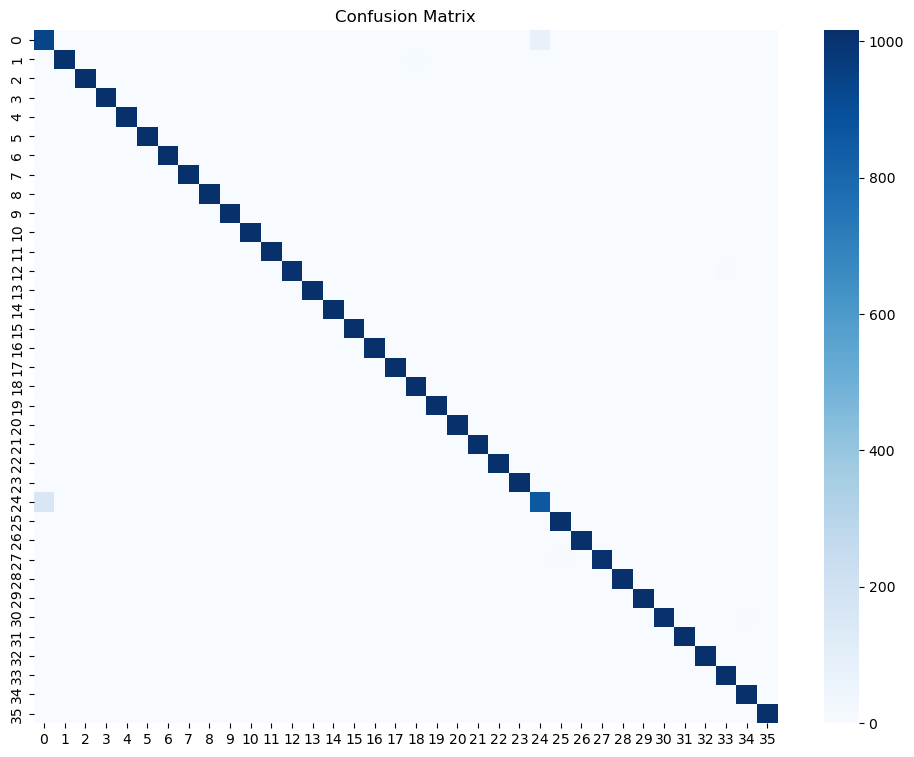

In [5]:
validate_main(model)     

# Deploy

In [6]:
deploy_main(model)

[DEPLOY] Preparando modelo REST PyFunc...


/home/dborrego/.local/lib/python3.13/site-packages/mlflow/pyfunc/__init__.py:3285: UserWarning: An input example was not provided when logging the model. To ensure the model signature functions correctly, specify the `input_example` parameter. See https://mlflow.org/docs/latest/model/signatures.html#model-input-example for more details about the benefits of using input_example.
  color_warning(
Registered model 'ocr_model_rest' already exists. Creating a new version of this model...
2026/01/22 02:36:16 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ocr_model_rest, version 5
Created version '5' of model 'ocr_model_rest'.


[DEPLOY] Modelo REST registrado correctamente.
[DEPLOY] Versión registrada: 5
🏃 View run deploy at: http://localhost:5000/#/experiments/789695712835189835/runs/a26851092c734a0bbab7b790dda99fef
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835


# END

In [7]:
mlflow.end_run()
print("Pipeline terminado.")

🏃 View run pipeline-20260121-183301 at: http://localhost:5000/#/experiments/789695712835189835/runs/e047fe6cbb9a43479f9e5c4afe4bd739
🧪 View experiment at: http://localhost:5000/#/experiments/789695712835189835
Pipeline terminado.
